<a href="https://colab.research.google.com/github/SarahAlhugail/SDA_Final_Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cridet Card  Customers

# Business Problem 

A bank manager worried about the increasing number of customers leaving the credit card services.In a business, the cost to get a new customer is usually much higher than what it takes to keep an existing one. For this purpose, the main goal will be predicting the highest number of potential churners to provide them better services and Achieve customer satisfaction to turn customers' decisions in the opposite direction. This is a classic business issue that happens in all industries and I will explore the customer behaviors to get more insights as well as applying the predictive modeling.


 
  
       
*   Supervised machine learning classification problem.
*   The target value will be Attrition_Flag.



### Dataset and Features

This dataset consists of 10,127 customers mentioning their age, salary, marital_status, credit card limit, credit card category and more, There are 23 features consisting of 6 objects and the remaining are either integer or float. It is a clean dataset with no null values encountered.

### [Data Dictionary](https://www.kaggle.com/sakshigoyal7/credit-card-customers)

**Attrition_Flag** : Wether the user leaved or not the service (Target)

**Customer_Age** : Customer's age in year

**Gender** : Customer's gender (male or female)

**Dependent_count** : Number of people who depend upon the customer for their support and welfare.

**Education_Level** : Customer's educational qualification (high school, graduate, etc.)

**Marital_Status** : Customer's marital status (married, single, etc.)

**Income_Category** :Customer's income bracket in dollars (less than 40K, 40K-60K, etc.)

**Card_Category** : Credit card category (Blue, Silver, etc.)

**Months_on_book** : Period of relationship with bank in months

**Total_Relationship_Count** : Total number of products held by the customer

**Months_Inactive_12_mon** : Number of months inactive in the last 12 months

**Contacts_Count_12_mon** : Number of contacts (phone calls) in the last 12 months

**Credit_Limit** : Credit limit on the credit card

**Total_Revolving_Bal** : Total revolving balance on the credit card

**Avg_Open_To_Buy** : Open to buy credit line (average of last 12 months). This 
also turns out to be the difference between the credit limit (Credit_Limit) assigned to a cardholder account and the present balance on the account (Total_Revolving_Bal).

**Total_Amt_Chng_Q4_Q1** : Change in total transactions amount (Q4 over Q1)

**Total_Trans_Amt**: Total transactions amount (last 12 months)

**Total_Trans_Ct** : Total number of transactions (last 12 months)

**Total_Ct_Chng_Q4_Q1**  : Change in total number of transactions (Q4 over Q1)

**Avg_Utilization_Ratio** : Average card utilization ratio



---

---




# Importing Necessary Libraries¶





In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV




---



In [2]:
# load the data 

df= pd.read_csv('https://github.com/SarahAlhugail/SDA_Final_Project/raw/main/Data/BankChurners.csv') 
df.head()

CLIENTNUM  ... Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0  768805383  ...                                            0.99991                                                                                
1  818770008  ...                                            0.99994                                                                                
2  713982108  ...                                            0.99998                                                                                
3  769911858  ...                                            0.99987                                                                                
4  709106358  ...                                            0.99998                                                                                

[5 rows x 23 columns]

# 2. Exploratory Data Analysis
successfully loaded data.  lets a look of the data.

In [3]:
# data shape , numbers of culomns and rows 
df.shape

(10127, 23)

In [4]:
# Data tayps 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
# numbers.. 
df.describe()

CLIENTNUM  ...  Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count  1.012700e+04  ...                                       10127.000000                                                                                 
mean   7.391776e+08  ...                                           0.840003                                                                                 
std    3.690378e+07  ...                                           0.365301                                                                                 
min    7.080821e+08  ...                                           0.000420                                                                                 
25%    7.130368e+08  ...                                           0.999660                                                                                 
50%    7.179264e+08  ...                                           0.999820                                                                                 
75%    7.731435e+08  ...                                           0.999900                                                                                 
max    8.283431e+08  ...                                           0.999990                                                                                 

[8 rows x 17 columns]

In [6]:
#dropping the last two columns "Naive_Bayes_Classifier", we don't need them
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'],
        axis=1,inplace=True)



In [7]:
# looking to the columns to make sure that the last two columns are droped !
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
# check if there is any null values !

df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
# disply the Attrition_Flag values
df.Attrition_Flag.value_counts()                                                                                                                     

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

### Data Visualization

Let's create some simple plots to check out the data!

For data visualization, we are going to use seaborn plots. Histogram, Scatter, boxplot, and finally heatmap plot usually helps us to understand data easily.

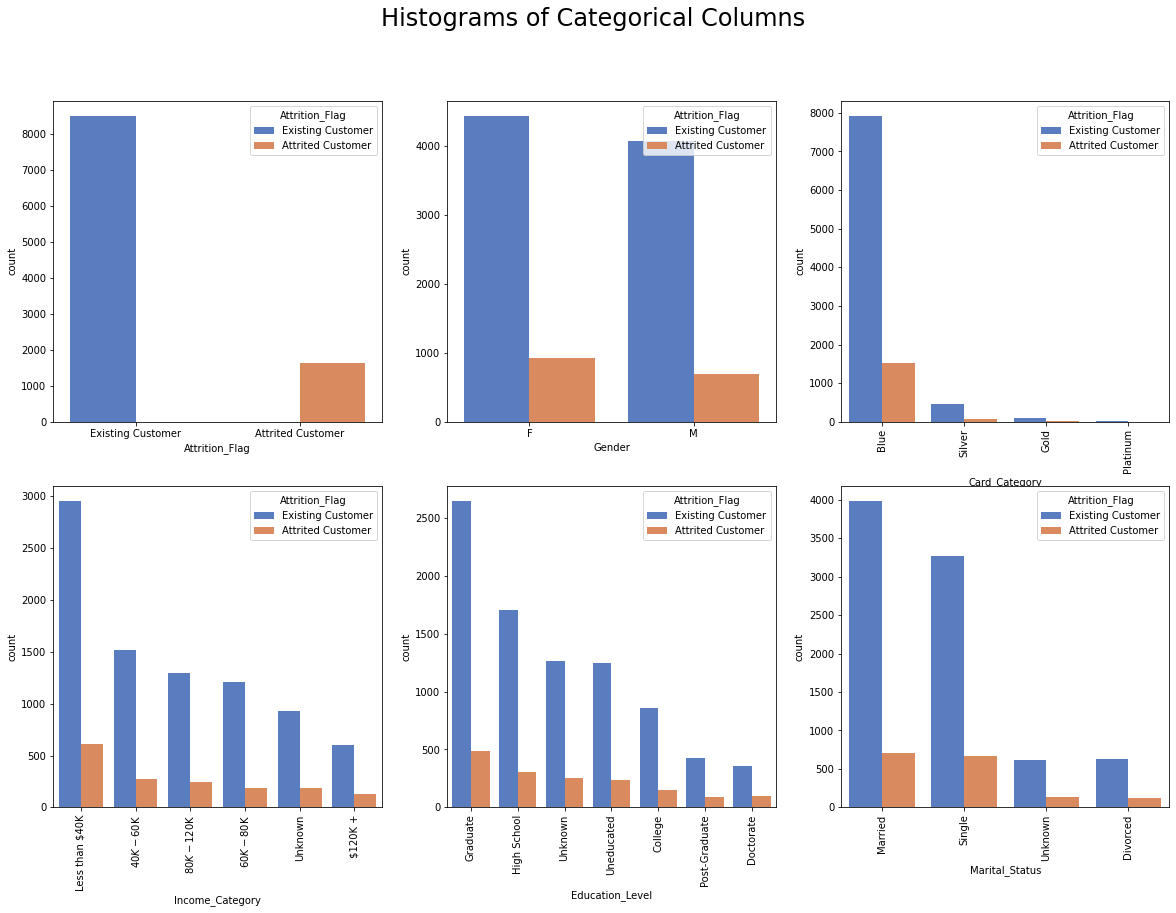

In [10]:
# columns name
columns = ['Attrition_Flag','Gender','Card_Category','Income_Category','Education_Level','Marital_Status']


norow = int(round(len(columns)/3,0))

fiq, ax = plt.subplots(norow, 3, figsize=(20,13))

# the title
plt.suptitle('Histograms of Categorical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
# loob 
for i,d in enumerate(columns):
   
     if i < 3:
       # create the counplot for the first line 
         chart = sns.countplot(x=df.loc[:,d], data=df, order = df.loc[:,d].value_counts().index, ax=ax[0,i], hue="Attrition_Flag", palette='muted')
         #sns.set(font_scale = 1)
         if df.loc[:,d].nunique() > 3: 
             chart.set_xticklabels(chart.get_xticklabels(), rotation=90)  
# create the counplot for the secoend  line
     else:chart = sns.countplot(x=df.loc[:,d], data=df, order = df.loc[:,d].value_counts().index, ax=ax[1,i-6], hue="Attrition_Flag", palette='muted')
     #sns.set(font_scale = 1)
     if df.loc[:,d].nunique() > 3: 
             chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
             
            
        
       

These plots can answer a lot of questions and clarify the data. The actual customer that moved out is 1,627 customers out of 8,500 existing customers (16% attrition).

 First, Based on gender, almost equal split between males and females.

Another interesting fact, they have significant customers with income less than 40,000,

And there are four product categories but the majority of customers signed up with Blue.!

And based on education level the significant customers with graduate degrees.

lastly, Marital status is also closely split between single and married.


---




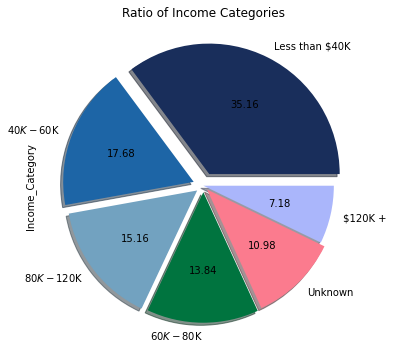

In [11]:
# pie plot 

colors=('#192e5b', '#1d65a6', '#72a2c0','#00743f','#FB7B8E','#AAB6FB')
explode=[0.1,0.08,0.06,0.05,0.04,0]
df["Income_Category"].value_counts().plot(kind='pie',shadow=True,explode=explode,colors=colors,autopct='%.2f',figsize=(8,6))
plt.title('Ratio of Income Categories')
plt.show()

Ass we saw in the previous chart the significant customers with income less than 40,000, here we can see the ratio of income.


---




Text(0.5, 1.0, 'Credit Limit values within card Category ')

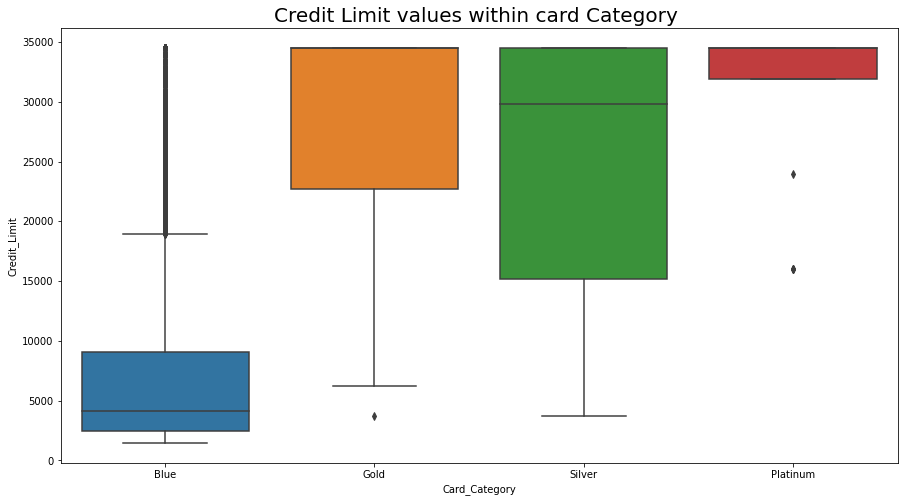

In [12]:
#distribution of total transaction values  within card category 
plt.figure(figsize=[15,8])

box=sns.boxplot(data=df, x="Card_Category", y="Credit_Limit").set_title("Credit Limit values within card Category ", fontsize=20);
box

Moreover, we saw in the previous chart there are four product categories, and the majority of customers signed up with Blue. here I want to take a detailed look at the category and the credit limit.

There is a lot of outliers in the Blue category, but it makes sense, and that because most of the consumers are using blue cards so it will be differences in credit limit.

---



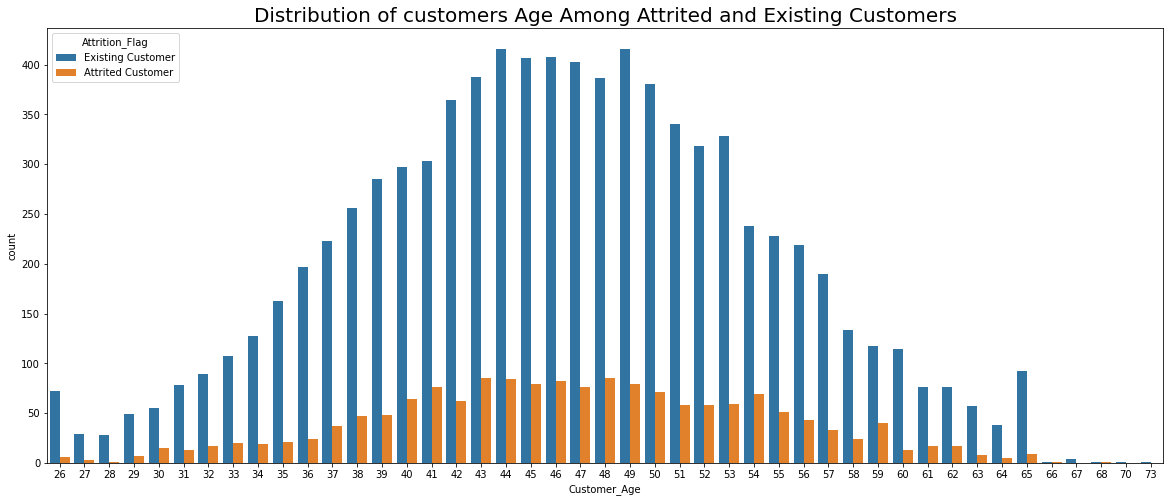

In [13]:
# I'm cureuse about costumers Age ! so les's create a chart for it


plt.figure(figsize=[20,8])
plt.xlabel('Customers Age')
sns.countplot(x='Customer_Age',data = df, hue='Attrition_Flag').set_title("Distribution of customers Age Among Attrited and Existing Customers", fontsize=20)
plt.show()

As you can see Customers' age ranges from 26 to 73 years, and most of the customers are from 42 to 53 years, also I can notice that they are the most churned customers



---



 

---


 
 The correlation between features with target column.

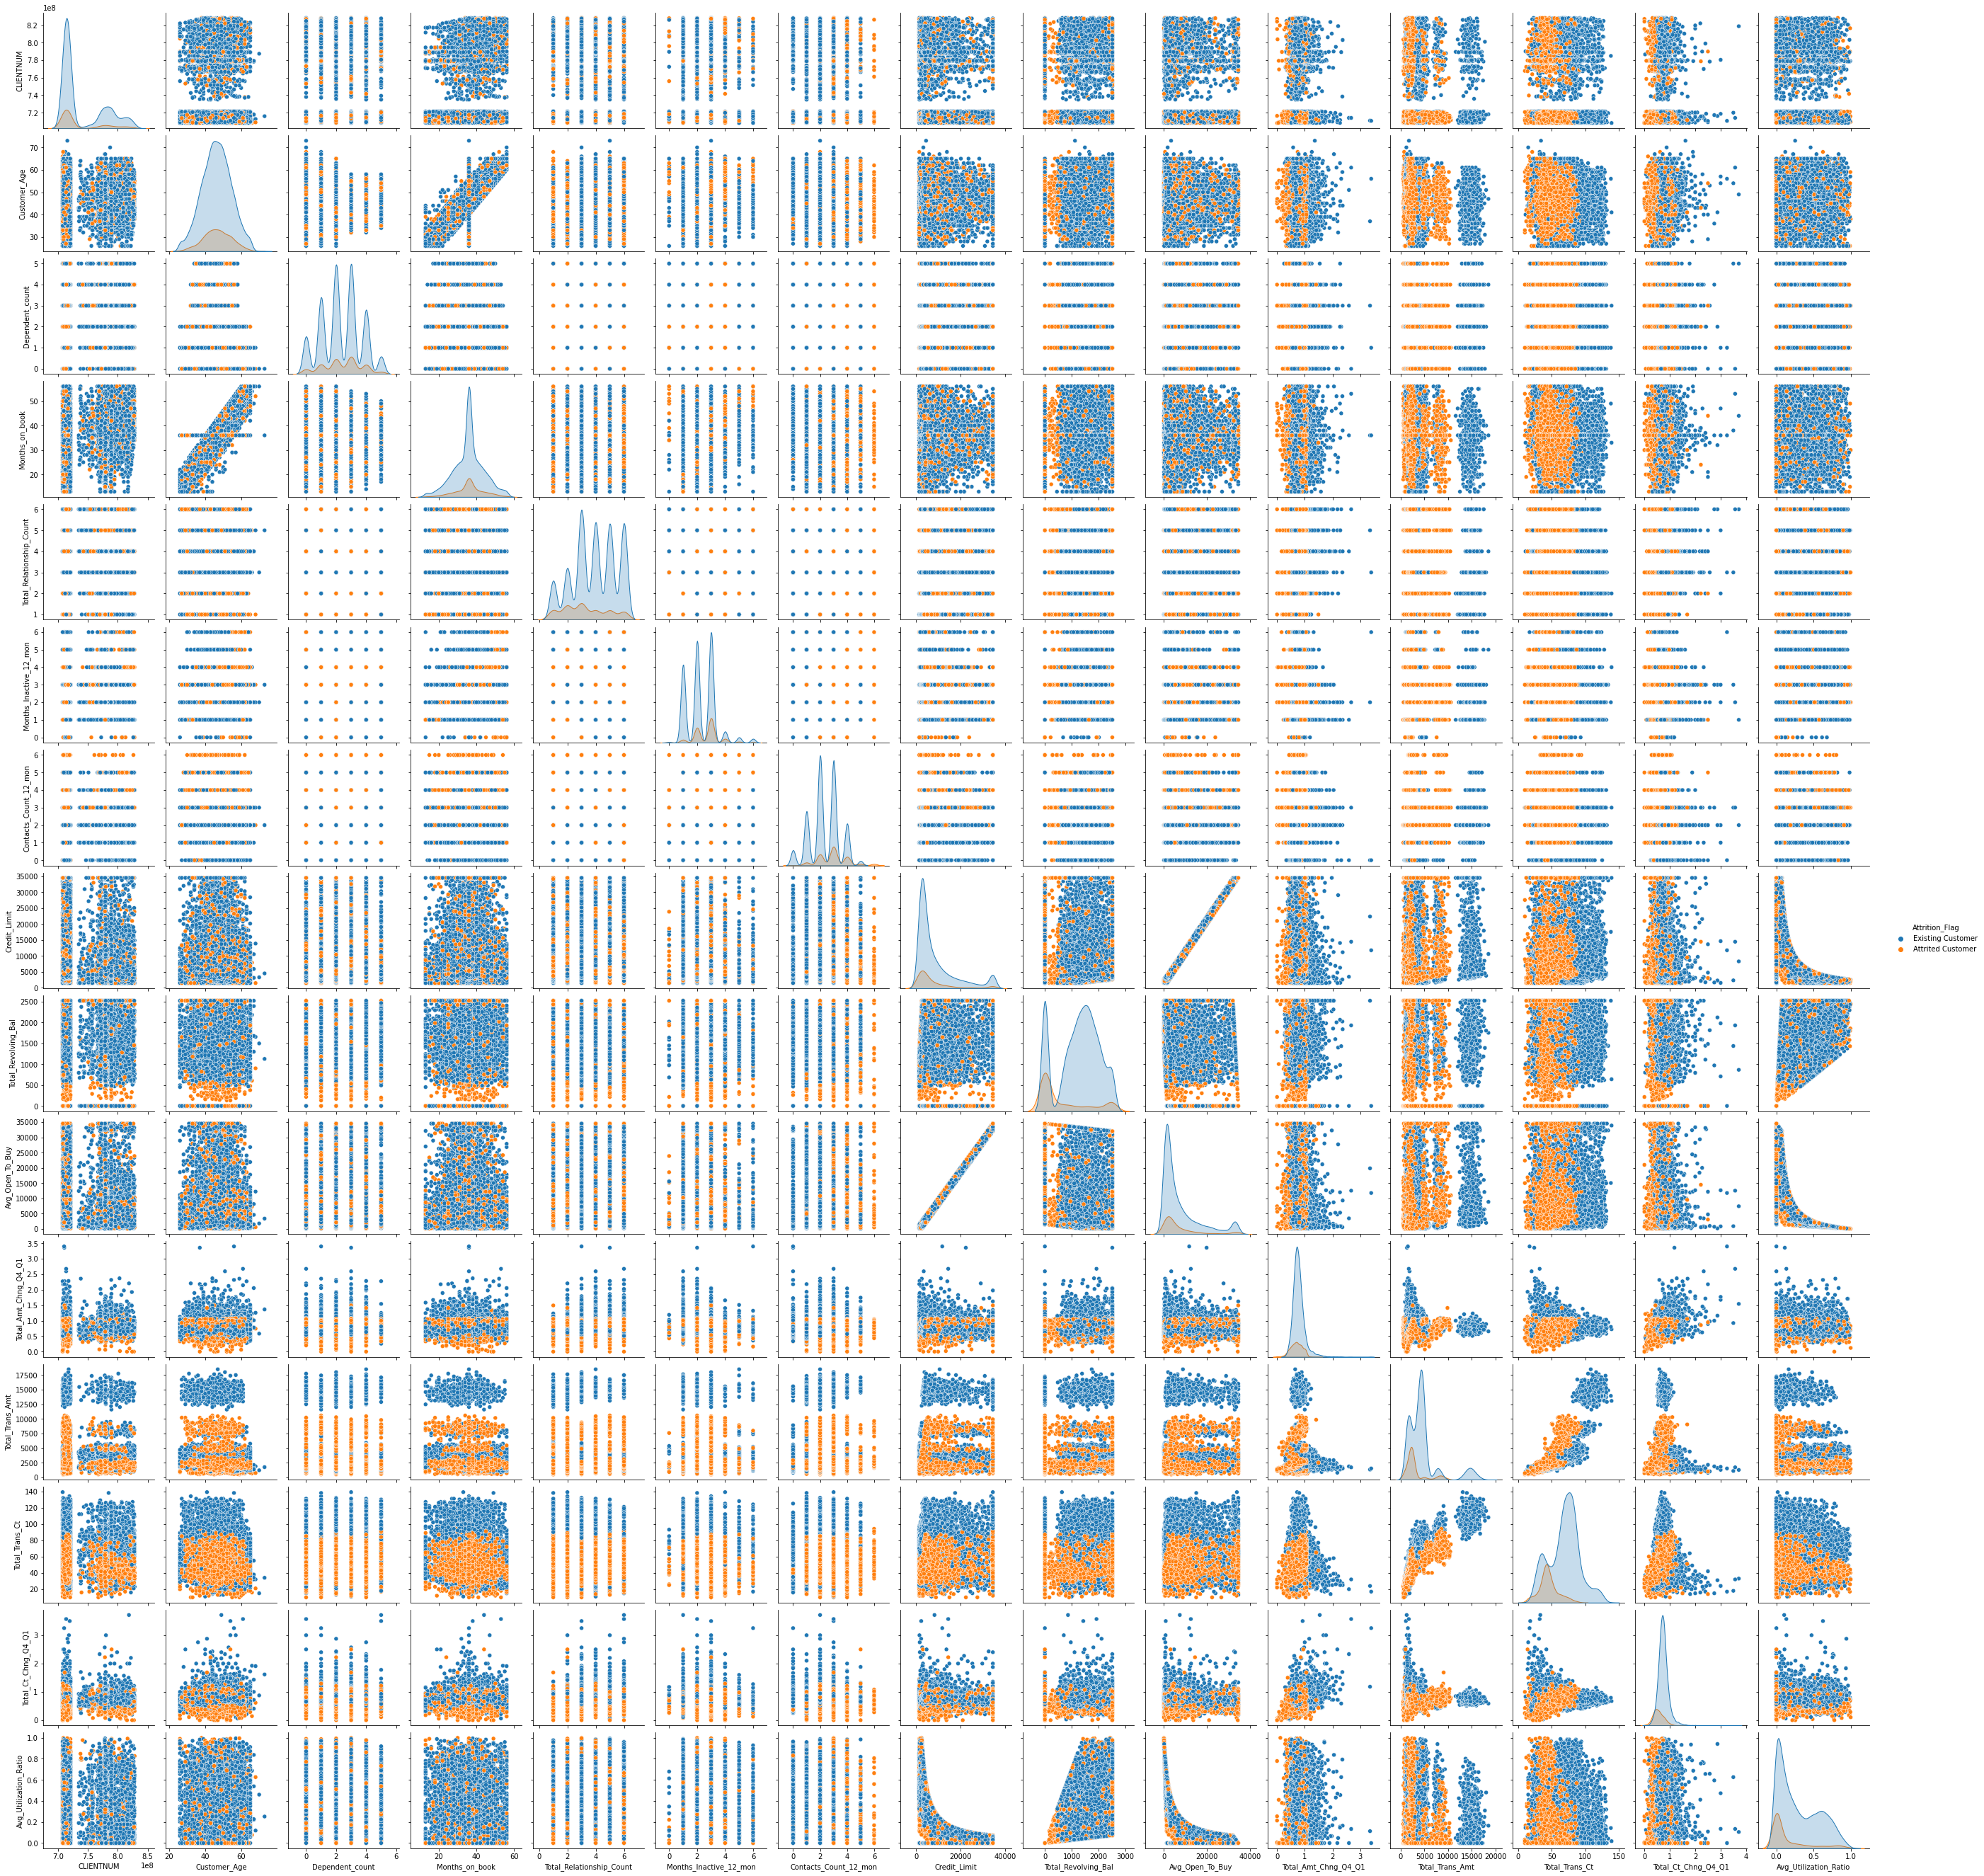

In [14]:
#Pairplot now conditioned by attrition
sns.pairplot(df, hue = 'Attrition_Flag')

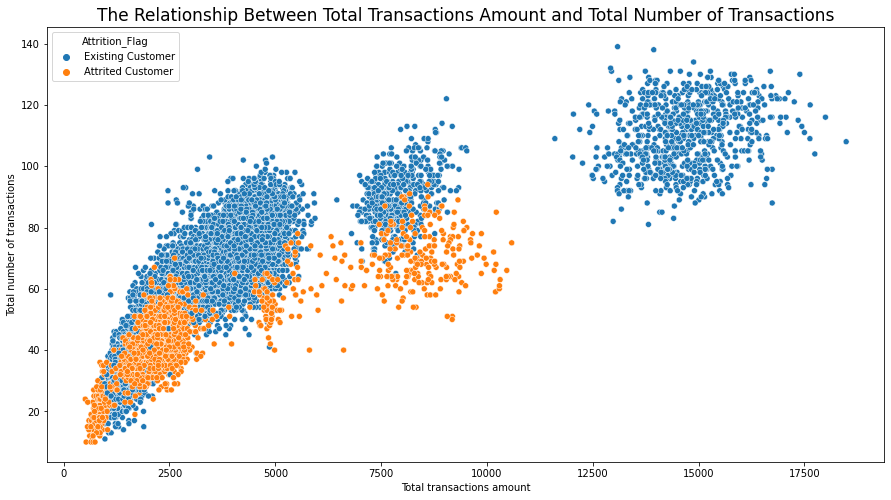

In [15]:
# let's fuces in the realshionship berween  Total transactions amount and Total number of transactions
plt.figure(figsize=[15,8])
plt.xlabel('Total transactions amount')
plt.ylabel('Total number of transactions')
scatter=sns.scatterplot(data=df,x= 'Total_Trans_Amt',y= 'Total_Trans_Ct',hue="Attrition_Flag").set_title("The Relationship Between Total Transactions Amount and Total Number of Transactions", fontsize=17);

In [16]:
scatter.get_figure().savefig("Scatter.png")


The total transactions number of Existing customers reached over 120 with a total amount over 17K, while the total transactions number of Attrited customers are less than 100 with a total amount of around 10k!

The question here is why the costumers make transactions with a high amount of money? :)

 It makes logical sense since anyone  who is planning on churning will try out another bank's services before closing down the current account! 
 

---








---
# Machine Learning


## Data Wrangling:

let's start to prepare the data for modeling. Convert all the Categorical data into numeric using map() and Dummies.

In [17]:
df.head()

CLIENTNUM     Attrition_Flag  ...  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio
0  768805383  Existing Customer  ...                1.625                 0.061
1  818770008  Existing Customer  ...                3.714                 0.105
2  713982108  Existing Customer  ...                2.333                 0.000
3  769911858  Existing Customer  ...                2.333                 0.760
4  709106358  Existing Customer  ...                2.500                 0.000

[5 rows x 21 columns]

In [18]:
# convert the categorical value 0 and 1 to boolean True and false using map()

df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0}).astype(int) # Existing Customer->1  Attrited Customer->-
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0}).astype(int)# F->1 , F->0 

df.tail()


CLIENTNUM  Attrition_Flag  ...  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio
10122  772366833               1  ...                0.857                  0.462
10123  710638233               0  ...                0.683                  0.511
10124  716506083               0  ...                0.818                  0.000
10125  717406983               0  ...                0.722                  0.000
10126  714337233               0  ...                0.649                  0.189

[5 rows x 21 columns]

In [19]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [20]:
#dummies
# Education_Level,	Marital_Status,	Income_Category,	Card_Category
df_new= pd.get_dummies(df.iloc[:,0:21])
df_new.tail()

CLIENTNUM  Attrition_Flag  ...  Card_Category_Platinum  Card_Category_Silver
10122  772366833               1  ...                       0                     0
10123  710638233               0  ...                       0                     0
10124  716506083               0  ...                       0                     0
10125  717406983               0  ...                       0                     0
10126  714337233               0  ...                       0                     1

[5 rows x 38 columns]

In [21]:
# size 
df_new.shape

(10127, 38)

In [22]:
#check
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CLIENTNUM                       10127 non-null  int64  
 1   Attrition_Flag                  10127 non-null  int64  
 2   Customer_Age                    10127 non-null  int64  
 3   Gender                          10127 non-null  int64  
 4   Dependent_count                 10127 non-null  int64  
 5   Months_on_book                  10127 non-null  int64  
 6   Total_Relationship_Count        10127 non-null  int64  
 7   Months_Inactive_12_mon          10127 non-null  int64  
 8   Contacts_Count_12_mon           10127 non-null  int64  
 9   Credit_Limit                    10127 non-null  float64
 10  Total_Revolving_Bal             10127 non-null  int64  
 11  Avg_Open_To_Buy                 10127 non-null  float64
 12  Total_Amt_Chng_Q4_Q1            

## Feature Selection

Now use corr() function to find the correlation among the columns

In [23]:
#create correlation map

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', )



---
## Train Test Split


Split up our data into an X  that contains the features to train on, and a y  with the target variable


In [24]:
# choosing  features based on  # high +- corr or  make sense in my head 

vars =["Months_Inactive_12_mon","Contacts_Count_12_mon"	,"Total_Trans_Ct","Customer_Age",
       "Total_Ct_Chng_Q4_Q1", "Total_Relationship_Count","Total_Trans_Amt","Total_Revolving_Bal","Avg_Utilization_Ratio","Total_Trans_Ct"]
X=df_new[vars]

y=df_new.Attrition_Flag	


Now let's split the data into a training set and a testing set. I will train out model on the training set and then use the test set to evaluate the model.
The dataset will be split 70% for training and remaining 30% will be data without label to determine the accuracy of the model.

In [25]:
#train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7,random_state=42)



---



## Baseline Model:
Simple Majority Classifier is often used as a baseline for comparing other machine learning techniques. 

In [26]:
#Simple Majority Classifie

simple = df_new.Attrition_Flag.value_counts(normalize=True)[1]
simple

0.8393403772094401

Got `0.8393403772094401` in Simple Majority Classifier!


---

---





## Model Building

After prepared data and split up, I can now start building models to achieve the goal of the project!

I'm going to predict those customers who will churn using more than one model to compare results and see which one will give the best result.



  [1- KNeighborsClassifier](https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm)

>  (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems.





[2- Logistic Regression :](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html)

>It’s a classification algorithm, that is used where the response variable is categorical. The idea of Logistic Regression is to find a relationship between features and probability of particular outcome.






[3- DecisionTreeClassifier :](https://psychology.wikia.org/wiki/Decision_tree_learning)
> A tree can be "learned" by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node has all the same value of the target variable, or when splitting no longer adds value to the predictions.





[4- RandomForestClassifier](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)


>A Random Forest classifier uses a number of decision trees, in order to improve the classification rate,  In a classification problem, each tree votes and the most popular class is chosen as the final result. In the case of regression, the average of all the tree outputs is considered as the final result. It is simpler and more powerful compared to the other non-linear classification algorithms.




>>>![image](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq.jpg)







###Let's Start 

##KNeighborsClassifier


In [27]:
# KNeighborsClassifier model

knn = KNeighborsClassifier(n_neighbors=3)
##fit X_train and y_train into the model 
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [28]:
# make preds
knn_preds = knn.predict(X_test)
knn_preds

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
#Accuracy Score of the knn model 
 
knn_acc= accuracy_score(y_test, knn.predict(X_test))
knn_acc

0.8950312602829879

In [30]:
#report


target_names = ['Lost-Customers','Existing-Customers']   # remember the order is 0,1 

print(classification_report(y_test,knn_preds,target_names=target_names))

                    precision    recall  f1-score   support

    Lost-Customers       0.70      0.63      0.66       496
Existing-Customers       0.93      0.95      0.94      2543

          accuracy                           0.90      3039
         macro avg       0.81      0.79      0.80      3039
      weighted avg       0.89      0.90      0.89      3039



## Logistic Regression 

In [31]:

#Accuracy Score of the LogisticRegression model 

lr = LogisticRegression(solver='liblinear')
#fit X_train and y_train into the model 
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# make preds

lr_preds = lr.predict(X_test)
lr_preds

array([1, 1, 1, ..., 1, 1, 0])

In [33]:
# make preds

lr_acc= accuracy_score(y_test, lr.predict(X_test))
lr_acc

0.8838433695294505

In [34]:
target_names = ['Lost-Customers','Existing-Customers']   # remember the order is 0,1  hence the labelling follow that order

print(classification_report(y_test,lr_preds,target_names=target_names))


                    precision    recall  f1-score   support

    Lost-Customers       0.74      0.45      0.56       496
Existing-Customers       0.90      0.97      0.93      2543

          accuracy                           0.88      3039
         macro avg       0.82      0.71      0.75      3039
      weighted avg       0.87      0.88      0.87      3039



## DecisionTreeClassifier


In [35]:
#Accuracy Score of the DecisionTreeClassifier model 

dt = DecisionTreeClassifier(random_state=0, max_depth=2)
#fit X_train and y_train into the model 
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [36]:
# make preds

dt_preds = lr.predict(X_test)
dt_preds

array([1, 1, 1, ..., 1, 1, 0])

In [37]:
#Accuracy Score of the dr model 


dt_acc= accuracy_score(y_test, dt.predict(X_test))
dt_acc

0.8835143139190523

## RandomForestClassifier

In [38]:
#Accuracy Score of the DecisionTreeClassifier model 

rf = RandomForestClassifier(random_state=22)
#fit X_train and y_train into the model 
rf.fit(X_train, y_train)




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

In [39]:
# make preds

rf_preds = rf.predict(X_test)
rf_preds

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
#Accuracy Score of the rf model 

rf_acc= accuracy_score(y_test, rf.predict(X_test))
rf_acc

0.9598552155314248

In [41]:
target_names = ['Lost-Customers','Existing-Customers']   # remember the order is 0,1  hence the labelling follow that order
#report
print(classification_report(y_test,rf_preds,target_names=target_names))


                    precision    recall  f1-score   support

    Lost-Customers       0.91      0.84      0.87       496
Existing-Customers       0.97      0.98      0.98      2543

          accuracy                           0.96      3039
         macro avg       0.94      0.91      0.92      3039
      weighted avg       0.96      0.96      0.96      3039



In [42]:
#recall score
recall= recall_score(y_test, rf_preds)
recall

0.983484073928431

## Which model gives the best result ?

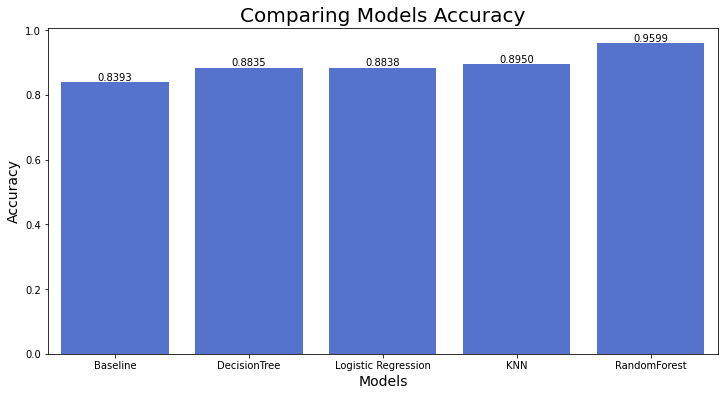

In [43]:
plt.figure(figsize=(12, 6))
accuracies = pd.DataFrame()
# create name list
accuracies['names'] = ['Baseline','DecisionTree','Logistic Regression','KNN','RandomForest']
# the values 
accuracies['values'] = [simple , dt_acc,lr_acc,knn_acc,rf_acc]
# barblot using seaborn 
splot=sns.barplot(x="names",y="values",data=accuracies, color="royalblue" )
# the percentage 
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.title('Comparing Models Accuracy',fontsize=20);

About the result :

all the models beat the Baseline.

The Decision tree and Logistic Regression give a pretty close Accuracy Score 88%

while the KNN gives a little higher Accuracy score ~ 90%

Lastly, The Random Forest Classifier scored 95% accuracy which is outperformed the previous models, I will choose this model and create a confusion matrix to talk more about the result!

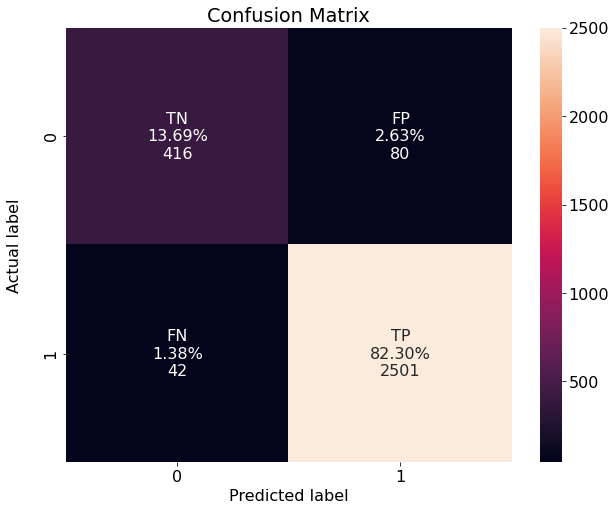

In [44]:
# create confusion matrix
y_pred = rf.predict(pd.DataFrame(X_test))
cf = confusion_matrix(y_test, y_pred)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)


plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})
heatmap1=sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n');

In [45]:
splot.get_figure().savefig("splot.png")


Existing Customer	= 1 , at= Attrited Customer 

TP = predicted Existing Customer	, is Existing Customer	

FP = predicted Existing Customer	, is Attrited Customer 

TN = predicted Attrited Customer , is Attrited Customer 

FN = predicted Attrited Customer , is Existing Customer


Here the most important metric is Recall since we want most of if not all the customers who want to churn so that the bank manager can propose plans to minimize the churning rate, so the recall score is 98% which is a great score but still have 42 customers incorrectly categorized as Attrited customers, so the manager will not provide them better services.

we need to reduce the FN by optimizing the model!

## let's try to Optmize the  model using GridSearchCV





In [46]:
#GridSearchCV 
p_grid = {
         'max_features': ['auto', 'sqrt', 'log2'],
          'n_estimators': [200, 700,900],
          'random_state':[20,30,40, 50, 60, 70, 80, 90, 100]}
grid = GridSearchCV(rf, p_grid,cv=10 )
grid

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=22,
                                 

In [47]:
#grid.fit(X_train, y_train)

In [48]:
#grid.best_params_



#  'max_features': 'log2',
#  'n_estimators': 700,
#'random_state': 70}

In [49]:
#try the model with the pest params
rf = RandomForestClassifier(
 max_features='log2',
 n_estimators= 700,
 random_state=70)
rf.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=70, verbose=0,
                       warm_start=False)

In [50]:
#make preds
rf_preds = rf.predict(X_test)
rf_preds

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
# accuracy after the optimization 
rf_acc= accuracy_score(y_test, rf.predict(X_test))
rf_acc

0.9618295491938138

In [52]:
target_names = ['Lost-Customers','Existing-Customers']   # remember the order is 0,1  hence the labelling follow that order

print(classification_report(y_test,rf_preds,target_names=target_names))


                    precision    recall  f1-score   support

    Lost-Customers       0.92      0.84      0.88       496
Existing-Customers       0.97      0.99      0.98      2543

          accuracy                           0.96      3039
         macro avg       0.95      0.91      0.93      3039
      weighted avg       0.96      0.96      0.96      3039



In [53]:
recall2= recall_score(y_test, rf_preds)
recall2

0.9862367282736925

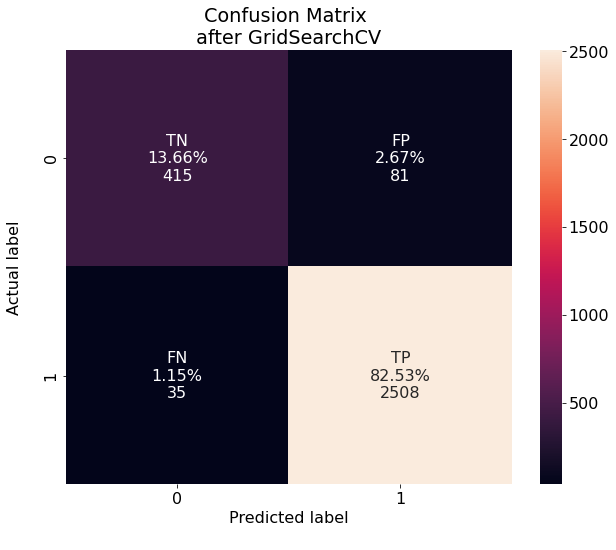

In [54]:
# create confusion matrix
y_pred = rf.predict(pd.DataFrame(X_test))
cf = confusion_matrix(y_test, y_pred)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)


plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})
heatmap2=sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix \n after GridSearchCV ")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n');

Final Result :

>As we see after Griddsearch:

>The Accuracy Score of RandomForest increase to 96% and Recall score increase to ~99%!

>so the number of customers that incorrectly categorized as Attrited customers decreases to 35 at the same time the number of TP increase to 2508. 


>which is a satisfactory result and hope that will help the manager to solve the problem and can provide them better services and Achieve costumer’s satisfaction to turn customers' decisions in the opposite direction.

---







# Short Summary

>In this project, I handle a Supervised machine learning classification problem. and the main goal is to predict those customers who will churn using more than one model to compare results and see which one will give the best result.
Random forest gives the higher Accuracy score and Recall score. moreover, I optimized the model using Grid Search and it helps to increase both the accuracy and recall score and achieve a satisfactory result with 96% Accuracy score.












Future Work :

Even though I achieved a good result there is always a way to improve it. 
like, gathering new data to improve model performance, try different techniques to select the features like Feature Importance. Also, try another model like  Extreme `Gradient Boosting Classifier(XGBoost)` it could be showing higher Accuracy.


Thank you

Done by :
Sarah Alhugail